TITANIC DATA ANALYSIS


Problem Statement: Use the Titanic passenger data (name, age, price of ticket, etc.) and predict who will survive and who will die.

In [297]:
#Titanic Data Anaysis
import warnings
warnings.filterwarnings("ignore")
#Load Data
import pandas as pd
train = pd.read_csv('D:/Docs/ShapeAI/Titanic/train.csv')
test = pd.read_csv('D:/Docs/ShapeAI/Titanic/test.csv')
sub = pd.read_csv('D:/Docs/ShapeAI/Titanic/gender_submission.csv')

all_data = pd.concat([train, test]).reset_index(drop = True)
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [298]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [299]:
all_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


<AxesSubplot:xlabel='Survived', ylabel='count'>

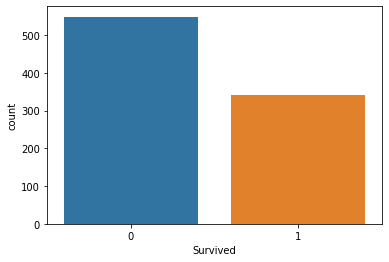

In [300]:
#Data Visualization using Seaborn and Matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(train['Survived'])

With below graph, we can see that Target(Survived) column is unbalanced.

In [301]:
survived = round(all_data.Survived.sum()/all_data.Survived.count(),3)
print("Percentage of people survived:", survived)

Percentage of people survived: 0.384


In [302]:
#check the distribution of categorical columns
all_data.nunique().sort_values()

Survived          2
Sex               2
Pclass            3
Embarked          3
SibSp             7
Parch             8
Age              98
Cabin           186
Fare            281
Ticket          929
Name           1307
PassengerId    1309
dtype: int64

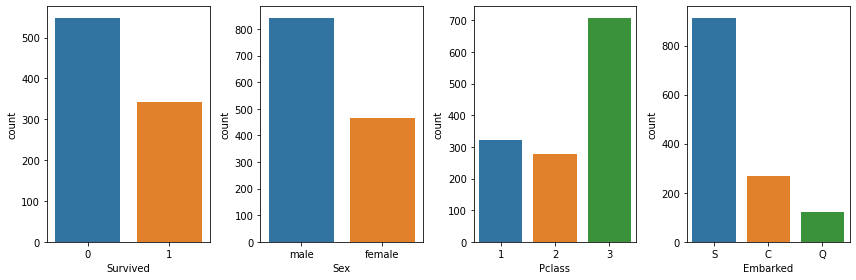

In [303]:
fig, ax = plt.subplots(1, 4, figsize = (12, 4)) # Making Subplots

sns.countplot(train['Survived'], ax=ax[0]);
sns.countplot(all_data['Sex'], ax=ax[1]);
sns.countplot(all_data['Pclass'], ax=ax[2]);
sns.countplot(all_data['Embarked'], ax=ax[3]);
plt.tight_layout() 
plt.show()

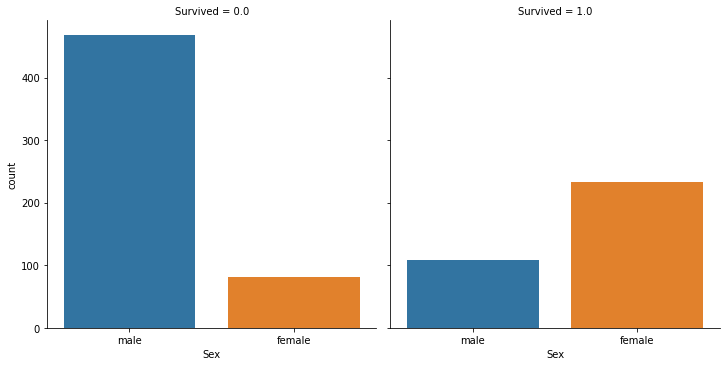

In [304]:
sns.catplot(x='Sex', col='Survived', kind='count', data=all_data)

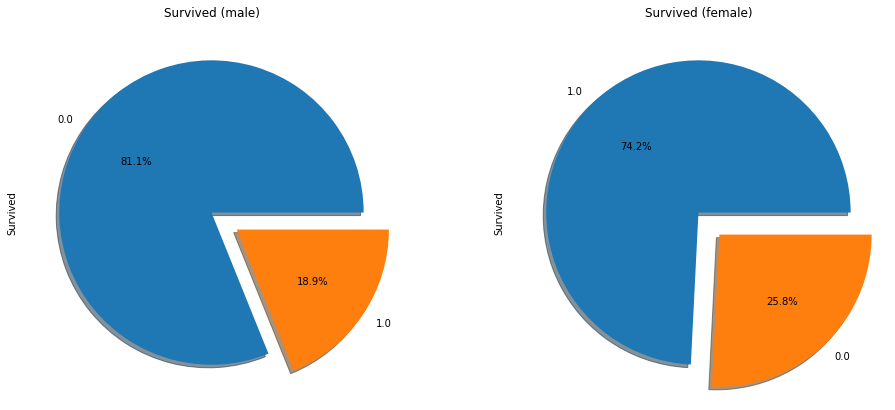

In [305]:
f,ax=plt.subplots(1,2,figsize=(16,7))
all_data['Survived'][all_data['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
all_data['Survived'][all_data['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

In [306]:
print("% of women survived: " , round(all_data[all_data.Sex == 'female'].Survived.sum()/all_data[all_data.Sex == 'female'].Survived.count(),3))
print("% of men survived:   " , round(all_data[all_data.Sex == 'male'].Survived.sum()/all_data[all_data.Sex == 'male'].Survived.count(),3))

% of women survived:  0.742
% of men survived:    0.189


Women were more likely to survive than men

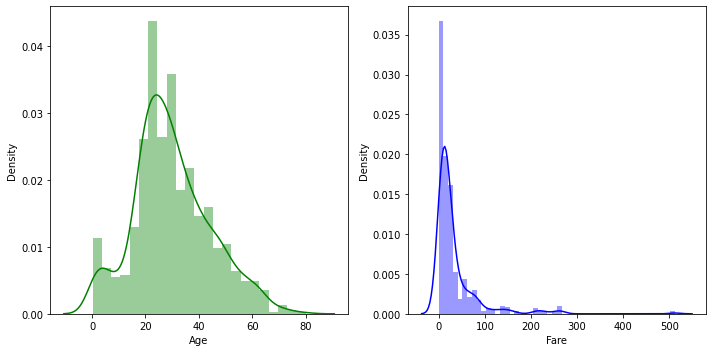

In [307]:
#Distribution of Age and Fare

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.distplot(all_data['Age'], ax=ax[0], color='g');
sns.distplot(all_data['Fare'], ax=ax[1], color='blue');
plt.tight_layout()
plt.show()

In [308]:
#Passenger Class : Survival rate decreases with Pclass

pd.crosstab(all_data.Pclass, all_data.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0.0,1.0,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [309]:
print("% of survivals in") 
print("Pclass=1 : ", round(all_data.Survived[all_data.Pclass == 1].sum()/all_data[all_data.Pclass == 1].Survived.count(),3))
print("Pclass=2 : ", round(all_data.Survived[all_data.Pclass == 2].sum()/all_data[all_data.Pclass == 2].Survived.count(),3))
print("Pclass=3 : ", round(all_data.Survived[all_data.Pclass == 3].sum()/all_data[all_data.Pclass == 3].Survived.count(),3))

% of survivals in
Pclass=1 :  0.63
Pclass=2 :  0.473
Pclass=3 :  0.242


In [310]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [311]:
all_data = all_data.drop(columns = ['Name', 'Ticket', 'Cabin', 'PassengerId'])
all_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,NaN,3,male,NaN,0,0,8.0500,S
1305,NaN,1,female,39.0,0,0,108.9000,C
1306,NaN,3,male,38.5,0,0,7.2500,S
1307,NaN,3,male,NaN,0,0,8.0500,S


In [312]:
all_data['Sex'] = all_data['Sex'].str.replace('male',"0")
all_data['Sex'] = all_data['Sex'].str.replace("female","1")
all_data['Sex'] = all_data['Sex'].str.replace("fe0","1")
all_data['Embarked'] = all_data['Embarked'].str.replace("S","1")
all_data['Embarked'] = all_data['Embarked'].str.replace("C","0")
all_data['Embarked'] = all_data['Embarked'].str.replace("Q","2")
all_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,0,22.0,1,0,7.2500,1
1,1.0,1,1,38.0,1,0,71.2833,0
2,1.0,3,1,26.0,0,0,7.9250,1
3,1.0,1,1,35.0,1,0,53.1000,1
4,0.0,3,0,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
1304,NaN,3,0,NaN,0,0,8.0500,1
1305,NaN,1,1,39.0,0,0,108.9000,0
1306,NaN,3,0,38.5,0,0,7.2500,1
1307,NaN,3,0,NaN,0,0,8.0500,1


In [313]:
#Handling NaN values
all_data = all_data.apply (pd.to_numeric, errors='coerce')
all_data = all_data.dropna()
all_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,0,22.0,1,0,7.2500,1.0
1,1.0,1,1,38.0,1,0,71.2833,0.0
2,1.0,3,1,26.0,0,0,7.9250,1.0
3,1.0,1,1,35.0,1,0,53.1000,1.0
4,0.0,3,0,35.0,0,0,8.0500,1.0
...,...,...,...,...,...,...,...,...
885,0.0,3,1,39.0,0,5,29.1250,2.0
886,0.0,2,0,27.0,0,0,13.0000,1.0
887,1.0,1,1,19.0,0,0,30.0000,1.0
889,1.0,1,0,26.0,0,0,30.0000,0.0


In [314]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=all_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]  # Features
y=all_data['Survived']  # Labels

In [315]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
#After splitting, you will train the model on the training set and perform predictions on the test set.
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#Create a Gaussian Classifier
decision_clf = DecisionTreeClassifier()
#Train the model using the training sets y_pred=clf.predict(X_test)
decision_clf.fit(X_train,y_train)

y_pred=decision_clf.predict(X_test)
#After training, check the accuracy using actual and predicted values.

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Model Accuracy is: ",metrics.accuracy_score(y_test, y_pred))

Model Accuracy is:  0.7897196261682243


In [316]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[106  27]
 [ 18  63]]
              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82       133
         1.0       0.70      0.78      0.74        81

    accuracy                           0.79       214
   macro avg       0.78      0.79      0.78       214
weighted avg       0.80      0.79      0.79       214



In [317]:
rf_clf=RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)
from sklearn import metrics
print("Model Accuracy is: ", metrics.accuracy_score(y_test,y_pred ))

Model Accuracy is:  0.8130841121495327


In [318]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[111  22]
 [ 18  63]]
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.85       133
         1.0       0.74      0.78      0.76        81

    accuracy                           0.81       214
   macro avg       0.80      0.81      0.80       214
weighted avg       0.82      0.81      0.81       214



In [319]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[111  22]
 [ 20  61]]
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84       133
         1.0       0.73      0.75      0.74        81

    accuracy                           0.80       214
   macro avg       0.79      0.79      0.79       214
weighted avg       0.80      0.80      0.80       214

0.8037383177570093


In [320]:
#Cross Validation Scores
from sklearn.model_selection import cross_val_score
scores_dt = cross_val_score(decision_clf, X_train, y_train, cv=10, scoring='accuracy')  #for decision tree classifier
print(scores_dt)
print(scores_dt.mean())

[0.76       0.78       0.78       0.86       0.82       0.7
 0.72       0.82       0.7755102  0.79591837]
0.7811428571428571


In [321]:
scores_rf = cross_val_score(rf_clf, X_train, y_train, cv=10, scoring='accuracy')  #for random forest
print(scores_rf)
print(scores_rf.mean())

[0.78       0.8        0.72       0.86       0.8        0.74
 0.82       0.82       0.81632653 0.85714286]
0.8013469387755101


In [322]:
scores_logis = cross_val_score(logreg, X_train, y_train, cv=10, scoring='accuracy')  #for random forest
print(scores_logis)
print(scores_logis.mean())

[0.78       0.84       0.72       0.84       0.84       0.74
 0.76       0.82       0.73469388 0.79591837]
0.7870612244897959


In [323]:
print("Decision Tree : " , scores_dt.mean())
print("Random Forest     : " , scores_rf.mean())
print("Logitic Regression     : " , scores_logis.mean())

Decision Tree :  0.7811428571428571
Random Forest     :  0.8013469387755101
Logitic Regression     :  0.7870612244897959
